In [1]:
import warnings
warnings.simplefilter('ignore')

import sys, os
sys.path.append('../../codes/')

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import PCA
import data_jupyter as data

#-------------------
# 1. データの作成
myData = data.unsupervised()
myData.makeData(dataType=2)
#-------------------

#-------------------
# 2. 主成分分析による次元削減
myModel = PCA.PCA(myData.X)
myModel.reduceDim(lowerDim=2)
#-------------------

#-------------------
# 3. モデルパラメータの表示
print(f"固有値:\nlambda={myModel.L}")
print(f"正規直交基底ベクトル:\nw=\n{myModel.W}")
#-------------------

固有値:
lambda=[4.36464160e+05 2.25400296e+04 8.37983715e-01]
正規直交基底ベクトル:
w=
[[ 9.68925039e-01  2.47345279e-01 -2.14050092e-03]
 [ 2.47344538e-01 -9.68927402e-01 -6.08512989e-04]
 [ 2.22450281e-03 -6.01622617e-05  9.99997524e-01]]


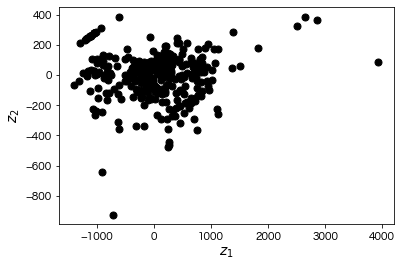

In [4]:
#-------------------
# 4. データと主成分軸のプロット
# 次元削減後のデータ（主成分得点）のプロット
if myModel.lowerDim == 2:
    myModel.plotResult()

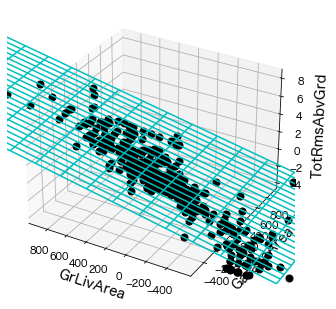

In [5]:
# 主成分軸（平面）のプロット
if (myData.X.shape[1] == 3) & (myModel.lowerDim == 2):
    myModel.plotModel3D(xLabel=myData.labels[0],yLabel=myData.labels[1],zLabel=myData.labels[2],nGrids=20)
#-------------------

In [6]:
#-------------------
# 5. モデルの評価
# 寄与率と累積寄与率の計算
contRatio,cumContRatio = myModel.compContRatio()
print(f"寄与率:{np.round(contRatio,decimals=1)}")
print(f"累積寄与率:{np.round(cumContRatio,decimals=1)}")

# 主成分負荷量の計算
print(f"主成分負荷量:\n{np.round(myModel.compLoading(),decimals=1)}")
#-------------------

寄与率:[95.1  4.9  0. ]
累積寄与率:[ 95.1 100.  100. ]
主成分負荷量:
[[ 1.   0.1]
 [ 0.7 -0.7]
 [ 0.8 -0. ]]
